In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
# Read the image 
image = cv2.imread('R.jpg')
# Convert to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [4]:
image.shape

(1800, 2880, 3)

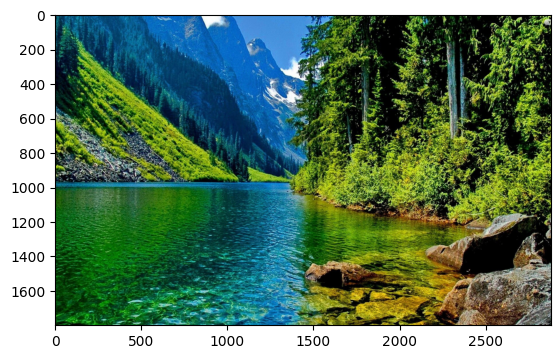

In [5]:
plt.imshow(image)

In [6]:
# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1,3))
# Convert to float 
pixel_values = np.float32(pixel_values)

In [7]:
print(pixel_values.shape)

(5184000, 3)


In [8]:
# Define stopping criteria 

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2)

In [17]:
# Number of clusters (k)

k = 3
_ , labels , (centers) = cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [18]:
# Convert back to 8 bit values 
centers = np.uint8(centers)

# Flatten the labels array 
labels = labels.flatten()

In [19]:
# Convert all pixels to the color of the centroids 
segmented_image = centers[labels.flatten()]

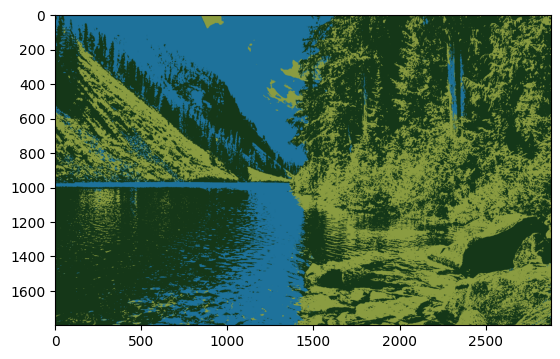

In [20]:
# Reshape back to the original image dimension 
segmented_image = segmented_image.reshape(image.shape)
# show the image 
plt.imshow(segmented_image)
plt.show()

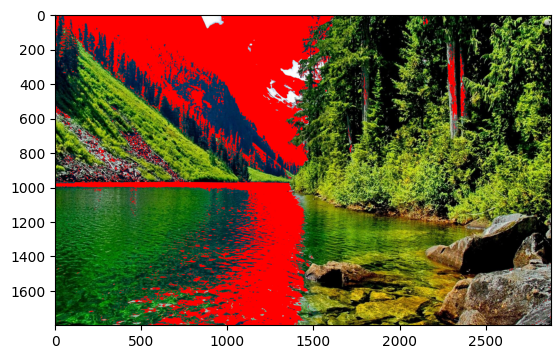

In [28]:
# disable only the cluster numbers 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values 
masked_image = masked_image.reshape((-1,3))
# color (i.e. cluster) to disable
cluster = 0
masked_image[labels == cluster] = [255 , 0 , 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image 
plt.imshow(masked_image)
plt.show()